# Computer Vision, Fall 2024

#### Name:

#### <font color='red'>Exercise 1, return latest on Sunday 15.9.2024 at 23.50 via Moodle</font>

Return the answer in PDF and Jupyter Notebook formats.

**Exercise notes**:

- For questions 1.1 you may answer by writing LaTex in Markdown cell, or by writing answer to the paper and then take photo from the paper.

## Exercise 1.1: Homogeneous Coordinates and Transformations (2 points)

#### a) Translate $(t)$, scale $(s)$, and rotate $(r)$ a point $c=(c_x, c_y)$ on the xy-plane to a new location $(d_x, d_y)$ as illustrated below.

![title](images/img01.png)
 
Using the translation $(2, 5)$, scaling $(-4, 7)$, and rotation $(50^{\circ})$, answer the following:

(i) Provide the matrix representation for the translation using homogeneous coordinates.

(ii) Provide the matrix representation for the scaling using homogeneous coordinates.

(iii) Provide the matrix representation for the rotation using homogeneous coordinates.

(iv) Transform the point $c=(1,2)$ on the xy-plane to a new location $(d_x, d_y)$ using given translation and scaling operations. Perform two separate tasks: first translation then scaling, and first scaling then translation. Compare the final locations and state if the order of transformations matters. You only need to provide the final locations.

Hint:

 - We have provided empty matrices for you. Fill them with the correct values.

#### 1.1.a i) Translation

    Answer:
$$
Translation:
\begin{bmatrix}
   1 & 0 & 2 \\
   0 & 1 & 5 \\
   0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
   c_x \\
   c_y \\
   1 \\
\end{bmatrix}
=
\begin{bmatrix}
   c_x + 2 \\
   c_y + 5 \\
   1 \\
\end{bmatrix}
$$

#### 1.1.a ii) Scaling

    Answer:
    
$$
Scale:
\begin{bmatrix}
   -4 & 0 & 0 \\
   0 & 7 & 0 \\
   0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
   c_x \\
   c_y \\
   1 \\
\end{bmatrix}
=
\begin{bmatrix}
   -4c_x \\
   7c_y \\
   1 \\
\end{bmatrix}
$$

#### 1.1.a iii) Rotation

    Answer:

$$
Rotation:
\begin{bmatrix}
   \cos(50^{\degree}) & -\sin(50^{\degree}) & 0 \\
   \sin(50^{\degree}) & \cos(50^{\degree}) & 0 \\
   0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
   c_x \\
   c_y \\
   1 \\
\end{bmatrix}
=
\begin{bmatrix}
   \cos(50^{\degree})c_x - \sin(50^{\degree})c_y \\
   \sin(50^{\degree}) c_x + \cos(50^{\degree}) c_y \\
   1 \\
\end{bmatrix}
$$

#### 1.1.a iv) Comparing the Outcomes: Translation Followed by Scaling vs. Scaling Followed by Translation

In [1]:
# import numpy as np

# c = np.array([[1.], [2.], [1.]])

# translation = np.array([[1, 0, 2], [0, 1, 5], [0, 0, 1]], dtype=np.float32)
# scaling = np.array([[-4, 0, 0], [0, 7, 0], [0, 0, 1]], dtype=np.float32)

# print(scaling @ (translation @ c))
# print(translation @ (scaling @ c))

    Answer: 

Translation then Scaling:

$$
\begin{bmatrix}
   -4 & 0 & 0 \\
   0 & 7 & 0 \\
   0 & 0 & 1 \\
\end{bmatrix}
\Bigl(
\begin{bmatrix}
   1 & 0 & 2 \\
   0 & 1 & 5 \\
   0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
   1 \\
   2 \\
   1 \\
\end{bmatrix}
\Bigl)
=
\begin{bmatrix}
   -12 \\
   49 \\
   1 \\
\end{bmatrix}
$$

Scaling then Translation:

$$
\begin{bmatrix}
   1 & 0 & 2 \\
   0 & 1 & 5 \\
   0 & 0 & 1 \\
\end{bmatrix}
\Bigl(
\begin{bmatrix}
   -4 & 0 & 0 \\
   0 & 7 & 0 \\
   0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
   1 \\
   2 \\
   1 \\
\end{bmatrix}
\Bigl)
=
\begin{bmatrix}
   -2 \\
   19 \\
   1 \\
\end{bmatrix}
$$

### Conclusion: the order of transformation matters since the matrix multiplication is generally non-communicative.

#### b) Homogeneous line

i) Give the formula for presenting a homogeneous coordinate as a line. Plot the homogeneous lines $l_1$ and $l_2$ in a 2D coordinate system where $l_1 = (1,0,1)$ and $l_2 = (6,0,2)$. Describe what the lines look like.

ii) Calculate the point where the homogeneous lines $l_1$ and $l_2$ join. Give an explanation for the result.

Hint:

 - the (3x1) homogenous point vector x must satisfy both $I_1^Tx = 0$ and $I_2^Tx = 0$. In other words, it should be orthogonal to both $I_1$ and $I_2$.

    Answer:
    
i)
The formula:
$$
    ax + by + c = 0
$$

Plot of 2 lines $l_1$ and $l_2$:

![title](res/ex1_1.png)

The two lines are parallel.


ii)
The intersection of 2 lines in homogenous coordinate:
$$
    l_1 \times l_2 = \begin{bmatrix}
        0 \\
        4 \\
        0 \\
    \end{bmatrix}
$$

Because 2 lines are parallel, their intersection lies in infinity. That explains why the third coordinate is $0$.

In [2]:
import numpy as np

l1 = np.float32([1, 0, 1])
l2 = np.float32([6, 0, 2])

np.linalg.cross(l1.squeeze(), l2.squeeze())

array([0., 4., 0.], dtype=float32)

## Exercise 1.2 OpenCV basics and image manipulation with Python. (3 points)

In this exercise we’ll start learning how to use Python and OpenCV for computer vision tasks.

In [3]:
# Import Python packages needed in this week exercises. 
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image

#### 1.2 a)

- Load the image located at 'images/lapland.jpeg'.
- State the shape (dimensions) of the image.
- Display the original image and each of its three color channels (Blue, Green, and Red) separately.

Hint: 

- By default, OpenCV's `imread` function reads images in BGR format, while Matplotlib displays images in RGB format. 
    - You can use OpenCV's `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` to convert the image from BGR to RGB.
- Images containing a single color channel are typically displayed using a grayscale colormap.
    - In matplotlib, you can use the parameter `cmap='gray'` to achieve this.

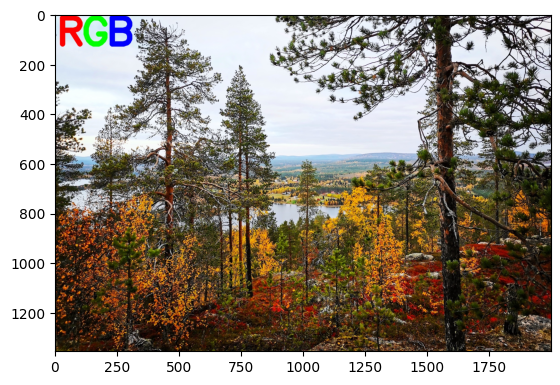

In [4]:
path = "images/lapland.jpeg"

img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [5]:
print(f"Image shape: {img.shape}")

Image shape: (1356, 2000, 3)


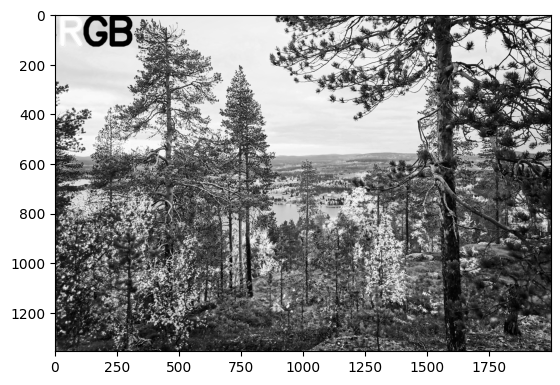

In [6]:
plt.imshow(img[:, :, 0], cmap='gray', vmin=0, vmax=255)
plt.show()

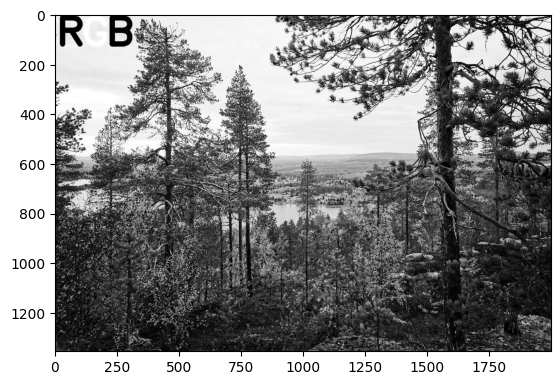

In [7]:
plt.imshow(img[:, :, 1], cmap='gray', vmin=0, vmax=255)
plt.show()

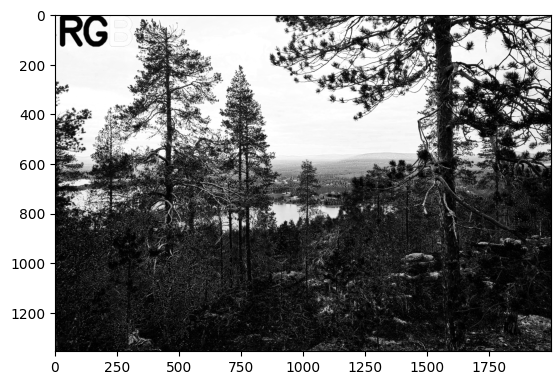

In [8]:
plt.imshow(img[:, :, 2], cmap='gray', vmin=0, vmax=255)
plt.show()

#### 1.2 b)

- Load the grayscale image 'images/white_cross.png'.
- Identify the point (x, y) where the white lines intersect. Assume the origin (0,0) is at the top-left corner.

The image below illustrates the coordinate system employed in this exercise, which is also frequently utilized in computer vision.

<img src="images/image_coordinates.png" width="350" align="center">

Hints:

- The image contains only two color values: 0 and 255, indicating it's a 1-channel black and white image.
- The intersecting lines are straight, parallel to the axis, and have a thickness of one pixel.

In [9]:
path = "images/white_cross.png"

img = cv2.imread(path, flags=cv2.IMREAD_GRAYSCALE).astype(np.int32)

img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [10]:
# Determine x-coordinate of intersection
for x in range(img.shape[1]):
    if img[0, x] == 255:
        break

# Determine y-coordinate of intersection
for y in range(img.shape[0]):
    if img[y, 0] == 255:
        break

assert img[y, x] == 255
print(f"Coordinate of intersection: ({x}, {y})")

Coordinate of intersection: (370, 190)


#### 1.2 c)

- Load the color image 'images/red_and_blue.jpg'.
- Determine the size of the red circle and blue rectangle in terms of pixel count.

Hint:

- The image only includes RGB color values: (0,0,0), (0,0,255), and (255,0,0).

In [11]:
path = "images/red_and_blue.png"

img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

reds = []
blues = []

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        if img[y, x, 0] == 255:
            reds.append((y, x))
        elif img[y, x, 2] == 255:
            blues.append((y, x))

print(f"Size of red area: {len(reds)}")
print(f"Size of blue area: {len(blues)}")

Size of red area: 709
Size of blue area: 726


## Exercise 1.3 Singular Value Decomposition (SVD). (3 points)

Singular Value Decomposition (SVD): Every $m \times p$ matrix factors into $A_{n \times p} = U_{n \times n} \Sigma_{n \times p} V^T_{p \times p}$

Singular Value Decomposition can be used for image compression by first applying SVD to the image matrix and then recomposing it by using only some of the singular values contained in matrix $\Sigma_{n \times p}$ and dropping the respective columns and rows in matrices $U_{n \times n}$ and $V^T_{p \times p}$ in order to make the matrices compatible for recomposing the image matrix.

Try this for yourself by decomposing images/lenna.png (open the image as grayscale) with SVD, and then recompose the image by using only the first 50 singular values (you can use the ready-made SVD function in numpy.linalg library, no need to implement it from scratch unless you want to). Also try using different number of singular values. How many singular values are needed before the image no longer appears blurry (Optional extra: how is the image size changed, i.e how much memory you save by compressing the image)?

Explain why this method of image compression works, what is the role of singular values and what information they contain? Brief explanation is enough for this assignment.

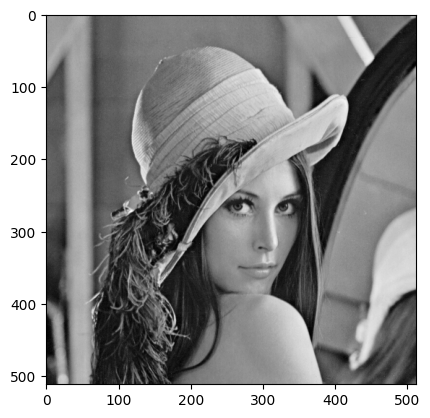

In [12]:
path = "images/lenna.png"

img = cv2.imread(path, flags=cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

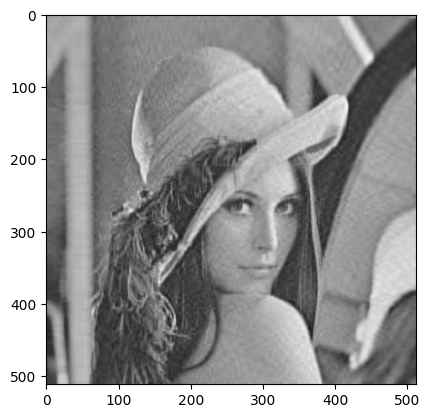

In [13]:
def compress(n: int):
    U, S, V = np.linalg.svd(img, full_matrices=False)

    img_reconstruct = U[:, :n] @ np.diag(S[:n]) @ V[:n, :]

    plt.imshow(img_reconstruct, cmap='gray', vmin=0, vmax=255)

compress(50)

### Answer for: From which value of singular quantity, the reconstructed image becomes clearer?

According to series of experiment, that value is 40

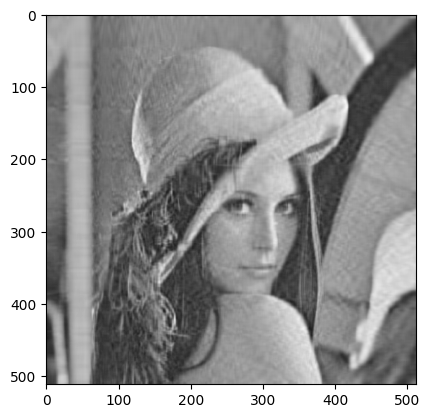

In [14]:
compress(40)

### Answer for: Explain why this method of image compression works, what is the role of singular values and what information they contain

SVD decomposes a matrix A into matrix U, Sigma and V where U contains eigenvetors of A and V contains corresponding eigenvalues. Row vectors in U contains basic structures of matrix A and eigenvalues in Sigma contains the factor by which the matrix A can be represented along eigenvectors in U.

In [15]:
img.shape

(512, 512)